In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/drive/MyDrive/data verzeo/images'

categories = ['elephant','horse'] 
target = []
flat_data = []
images=[]

for i in categories:
  class_num=categories.index(i)
  path = os.path.join(datadir,i)
 
  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))
    
    img_resize = resize(img_array,(150,150,3))
     
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)
   
flat_data = np.array(flat_data)
target = np.array(target)

WW187785.jpg
file-20180803-41366-8x4waf.jfif
Asian_Elephants_WW252891.jpg
download.jfif
download (1).jfif
download (2).jfif
download (3).jfif
download (4).jfif
download (5).jfif
download (6).jfif
download (7).jfif
download (8).jfif
images.jfif
images (1).jfif
images (2).jfif
images (3).jfif
images (4).jfif
images (5).jfif
images (6).jfif
images (7).jfif
images (8).jfif
download (9).jfif
download.jfif
download (1).jfif
download (2).jfif
download (3).jfif
download (4).jfif
download (5).jfif
download (6).jfif
download (7).jfif
download (8).jfif
images.jfif
images (1).jfif
images (2).jfif
images (3).jfif
images (4).jfif
images (5).jfif
download (10).jfif
download (11).jfif
images (6).jfif
images (7).jfif


<BarContainer object of 2 artists>

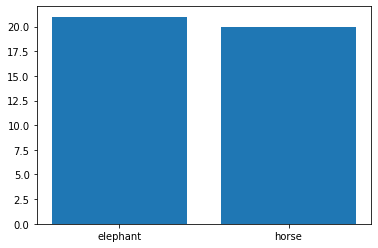

In [2]:
unique,count =np.unique(target,return_counts=True)
plt.bar(categories,count)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=105)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
            ]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [6]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix 

In [8]:
accuracy_score(y_pred,y_test)

0.8461538461538461

In [9]:
confusion_matrix(y_pred,y_test)

array([[5, 0],
       [2, 6]])

In [10]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [11]:
model=pickle.load(open('img_model.p','rb'))

Enter the URL https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQT4scEO_e5VSIps9XMjZ4ck9zrqjBEFBH3pQ&usqp=CAU
(213, 236, 3)
Predicted Output:elephant


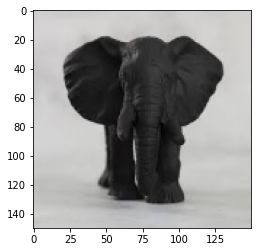

In [12]:
flat_data=[]
url = input('Enter the URL ')
img = imread(url)
img_resize=resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out=model.predict(flat_data)
y_out= categories[y_out[0]] 
print(f'Predicted Output:{y_out}')

In [13]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 15.0MB/s 
     |████████████████████████████████| 174kB 43.8MB/s 
     |████████████████████████████████| 4.2MB 27.7MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 112kB 42.3MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 122kB 40.5MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [26]:
%%writefile app3.py
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import streamlit as st
st.title('Image classifier By Aalisha PAtro')

u_file =  st.file_uploader('choose file', type='.jpg')

model = pickle.load(open('img_model.p', 'rb'))

if u_file is not None:
  img = Image.open(u_file)
  st.image(img , caption='processing')
  if st.button('predict'):
    categories = ['elephant','horse']
    img = np.array(img)
    flat_data=[]
    img_resize=resize(img,(150,150,3))
    flat_data.append(img_resize.flatten())
    flat_data=np.array(flat_data)
    print(img.shape)
    plt.imshow(img_resize)
    y_out=model.predict(flat_data)
    y_out= categories[y_out[0]] 
    st.title(f'Predicted Output:{y_out}')
    








Overwriting app3.py


In [15]:
!nohup streamlit run app3.py &
url = ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
http://9e4c598fd751.ngrok.io
